# Analysis of VEHICLe Fragments Aligned to BRD4

In [1]:
%load_ext autoreload
%autoreload 2
%load_ext jupyter_black

In [2]:
import sys

sys.path.append("../")
sys.path.append("../../")

In [3]:
import pickle
import pandas as pd

import seaborn as sns

from rdkit import Chem

In [4]:
from utils import show

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


Load alignement data:

In [5]:
with open("BRD4-VEHICLe.pkl", "br") as fin:
    alignments = pickle.load(fin)

Convert nested index values into tuples:

In [6]:
d = {}
for outerKey, innerDict in alignments.items():
    for innerKey, values in innerDict.items():
        d[(outerKey, innerKey)] = values

In [7]:
df = pd.DataFrame.from_dict(d)
df = df.stack(level=0).swaplevel().sort_index()
df.index.names = ["lig", "idx"]
df

cfit  fragment  \
lig      idx                        
ligand-1 0     0.867435      1046   
         1     0.898396         0   
         2     0.779141         1   
         3     0.809783      1047   
         4     0.883582        10   
...                 ...       ...   
ligand-9 5414  0.817647       995   
         5415  0.822034       996   
         5416  0.748428       997   
         5417  0.854795       998   
         5418  0.916427       999   

                                                        fragmol      gfit  \
lig      idx                                                                
ligand-1 0     <rdkit.Chem.rdchem.Mol object at 0x7fac87e53090>  0.841499   
         1     <rdkit.Chem.rdchem.Mol object at 0x7fac87e53130>  0.401070   
         2     <rdkit.Chem.rdchem.Mol object at 0x7fac87e53180>  0.699387   
         3     <rdkit.Chem.rdchem.Mol object at 0x7fac87e531d0>  0.760870   
         4     <rdkit.Chem.rdchem.Mol object at 0x7fac87e53220>  0.761194   
...                                                         ...       ...   
ligand-9 5414  <rdkit.Chem.rdchem.Mol object at 0x7fac87b8eef0>  0.708824   
         5415  <rdkit.Chem.rdchem.Mol object at 0x7fac87b8ef40>  0.728814   
         5416  <rdkit.Chem.rdchem.Mol object at 0x7fac87b8ef90>  0.742138   
         5417  <rdkit.Chem.rdchem.Mol object at 0x7fac87b91040>  0.769863   
         5418  <rdkit.Chem.rdchem.Mol object at 0x7fac87b91090>  0.752161   

                                                            mol  
lig      idx                                                     
ligand-1 0     <rdkit.Chem.rdchem.Mol object at 0x7fac87e530e0>  
         1     <rdkit.Chem.rdchem.Mol object at 0x7fac87e530e0>  
         2     <rdkit.Chem.rdchem.Mol object at 0x7fac87e530e0>  
         3     <rdkit.Chem.rdchem.Mol object at 0x7fac87e530e0>  
         4     <rdkit.Chem.rdchem.Mol object at 0x7fac87e530e0>  
...                                                         ...  
ligand-9 5414  <rdkit.Chem.rdchem.Mol object at 0x7fac87b91540>  
         5415  <rdkit.Chem.rdchem.Mol object at 0x7fac87b91540>  
         5416  <rdkit.Chem.rdchem.Mol object at 0x7fac87b91540>  
         5417  <rdkit.Chem.rdchem.Mol object at 0x7fac87b91540>  
         5418  <rdkit.Chem.rdchem.Mol object at 0x7fac87b91540>  

[54190 rows x 5 columns]

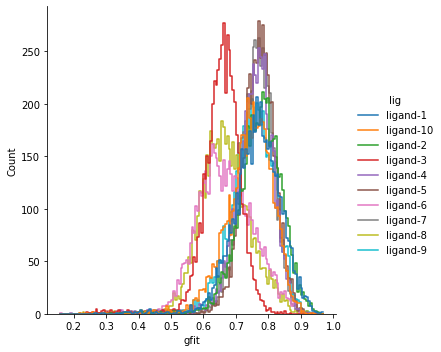

In [8]:
sns.displot(df, x="gfit", hue="lig", element="step", fill=False)

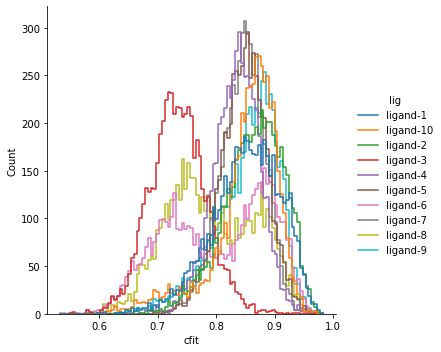

In [9]:
sns.displot(df, x="cfit", hue="lig", element="step", fill=False)

In [10]:
def getbest(df, lig, criteria="cfit", k=10):
    return df.query("lig == @lig").sort_values(criteria, ascending=False).head(k)


def showbest(df, lig, criteria="cfit", k=10):
    best = getbest(df, lig, criteria, k)

    for idx, row in best.iterrows():
        p = show(row.fragmol, row.mol)
        print(row[criteria])
        display(p)

In [11]:
showbest(df, "ligand-8", "cfit")

0.979381443298969


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

0.9760765550239234


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

0.9540229885057471


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

0.9526462395543176


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

0.950354609929078


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

0.95


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

0.9498327759197325


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

0.9491525423728814


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

0.9491525423728814


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

0.9473684210526315


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol